# SI 650 Homework 1
---------------------------
Name: Junqi Chen 

Uniqname: junqich

---------------------------

## Preprocess

In [132]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
nlp = spacy.load("en_core_web_sm") # load the pretrained model

# update the stop words
nlp.Defaults.stop_words -= nlp.Defaults.stop_words
with open("stoplist.txt", "rb") as file:
    stopwords = file.readlines()
stopwords = {str.decode("utf-8").replace("\n", "").replace("\r", "") for str in stopwords} # turn it into a list of string
nlp.Defaults.stop_words |= stopwords

# name the collections
collection1 = "si650-f21-reddit-questions.txt"
collection2 = "si650.f21.wiki-bios.10k.txt"

In [117]:
def preProcessCollection(filename):
    # This is a function used to preprocess the collection, 
    # storing the result of the tokenization into a list for future use
    # Input: filename of a collection
    # Output: a list of document
    with open(filename, "rb") as file:
        data = file.readlines()
    data = [str.decode("utf-8").replace("\n","") for str in data]

    doc_list = []
    for sentence in data:
        doc = nlp(sentence)
        doc_list.append(doc)
        
    return doc_list

# two global variables for future use
doc_list1 = preProcessCollection(collection1)
doc_list2 = preProcessCollection(collection2)

## Question 2

### Q2-1

D:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


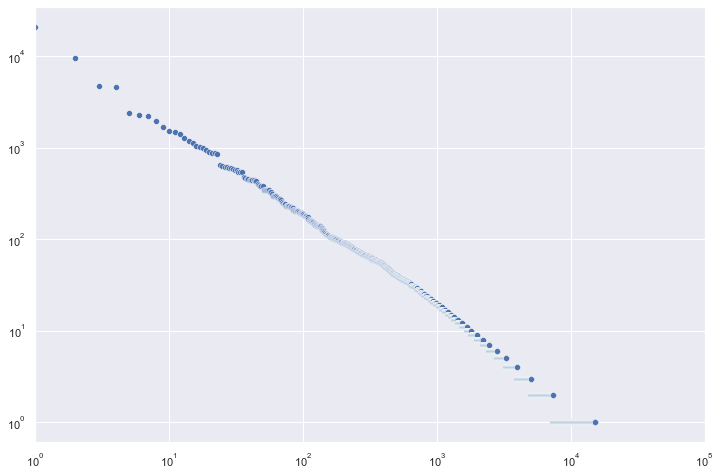

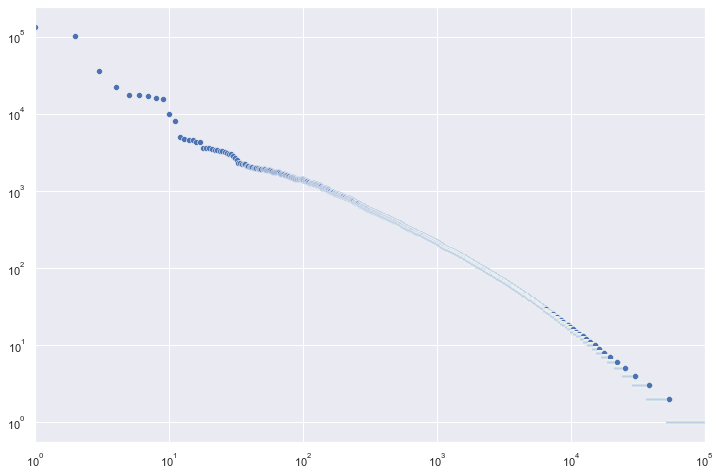

In [157]:
def wordFreqPlot(doc_list):
    # count the word freq
    token_text_dict = {} # the dict of (key = text of token, value = freq)
    for doc in doc_list:
        for token in doc:
            if not token.is_stop:
                if token.text not in token_text_dict.keys():
                    token_text_dict[token.text] = 1
                else:
                    token_text_dict[token.text] += 1
#     token_text_dict = {k: v for k, v in sorted(token_text_dict.items(), key=lambda x: x[1], reverse=True)} # sorted according to freq of token
    freq = sorted(token_text_dict.values(), reverse=True)
    
    # plot loglog graph with plt
#     fig = plt.figure(figsize=(20, 10))
#     plt.scatter(range(len(freq))[:n], freq[:n])
#     plt.xscale("log")
#     plt.yscale("log")
#     plt.show()
    
    # plot loglog graph with sns
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(figsize=(12, 8))
    plot = sns.scatterplot(range(1, len(freq)+1), freq)
    plot.set(xscale="log")
    plot.set(yscale="log")
    ax.set_xlim(1,10**5)

wordFreqPlot(doc_list1)
wordFreqPlot(doc_list2)

Each plot looks exactly the same as a power-law distribution. 

Two distribution follows the similar distribution (power-law distribution) but different in parameters. We can see that plot 1 has smaller scales in both domain and range, which is from 1 to 10^4 while plot 2 scales from 1 to 10^5 on both axis.

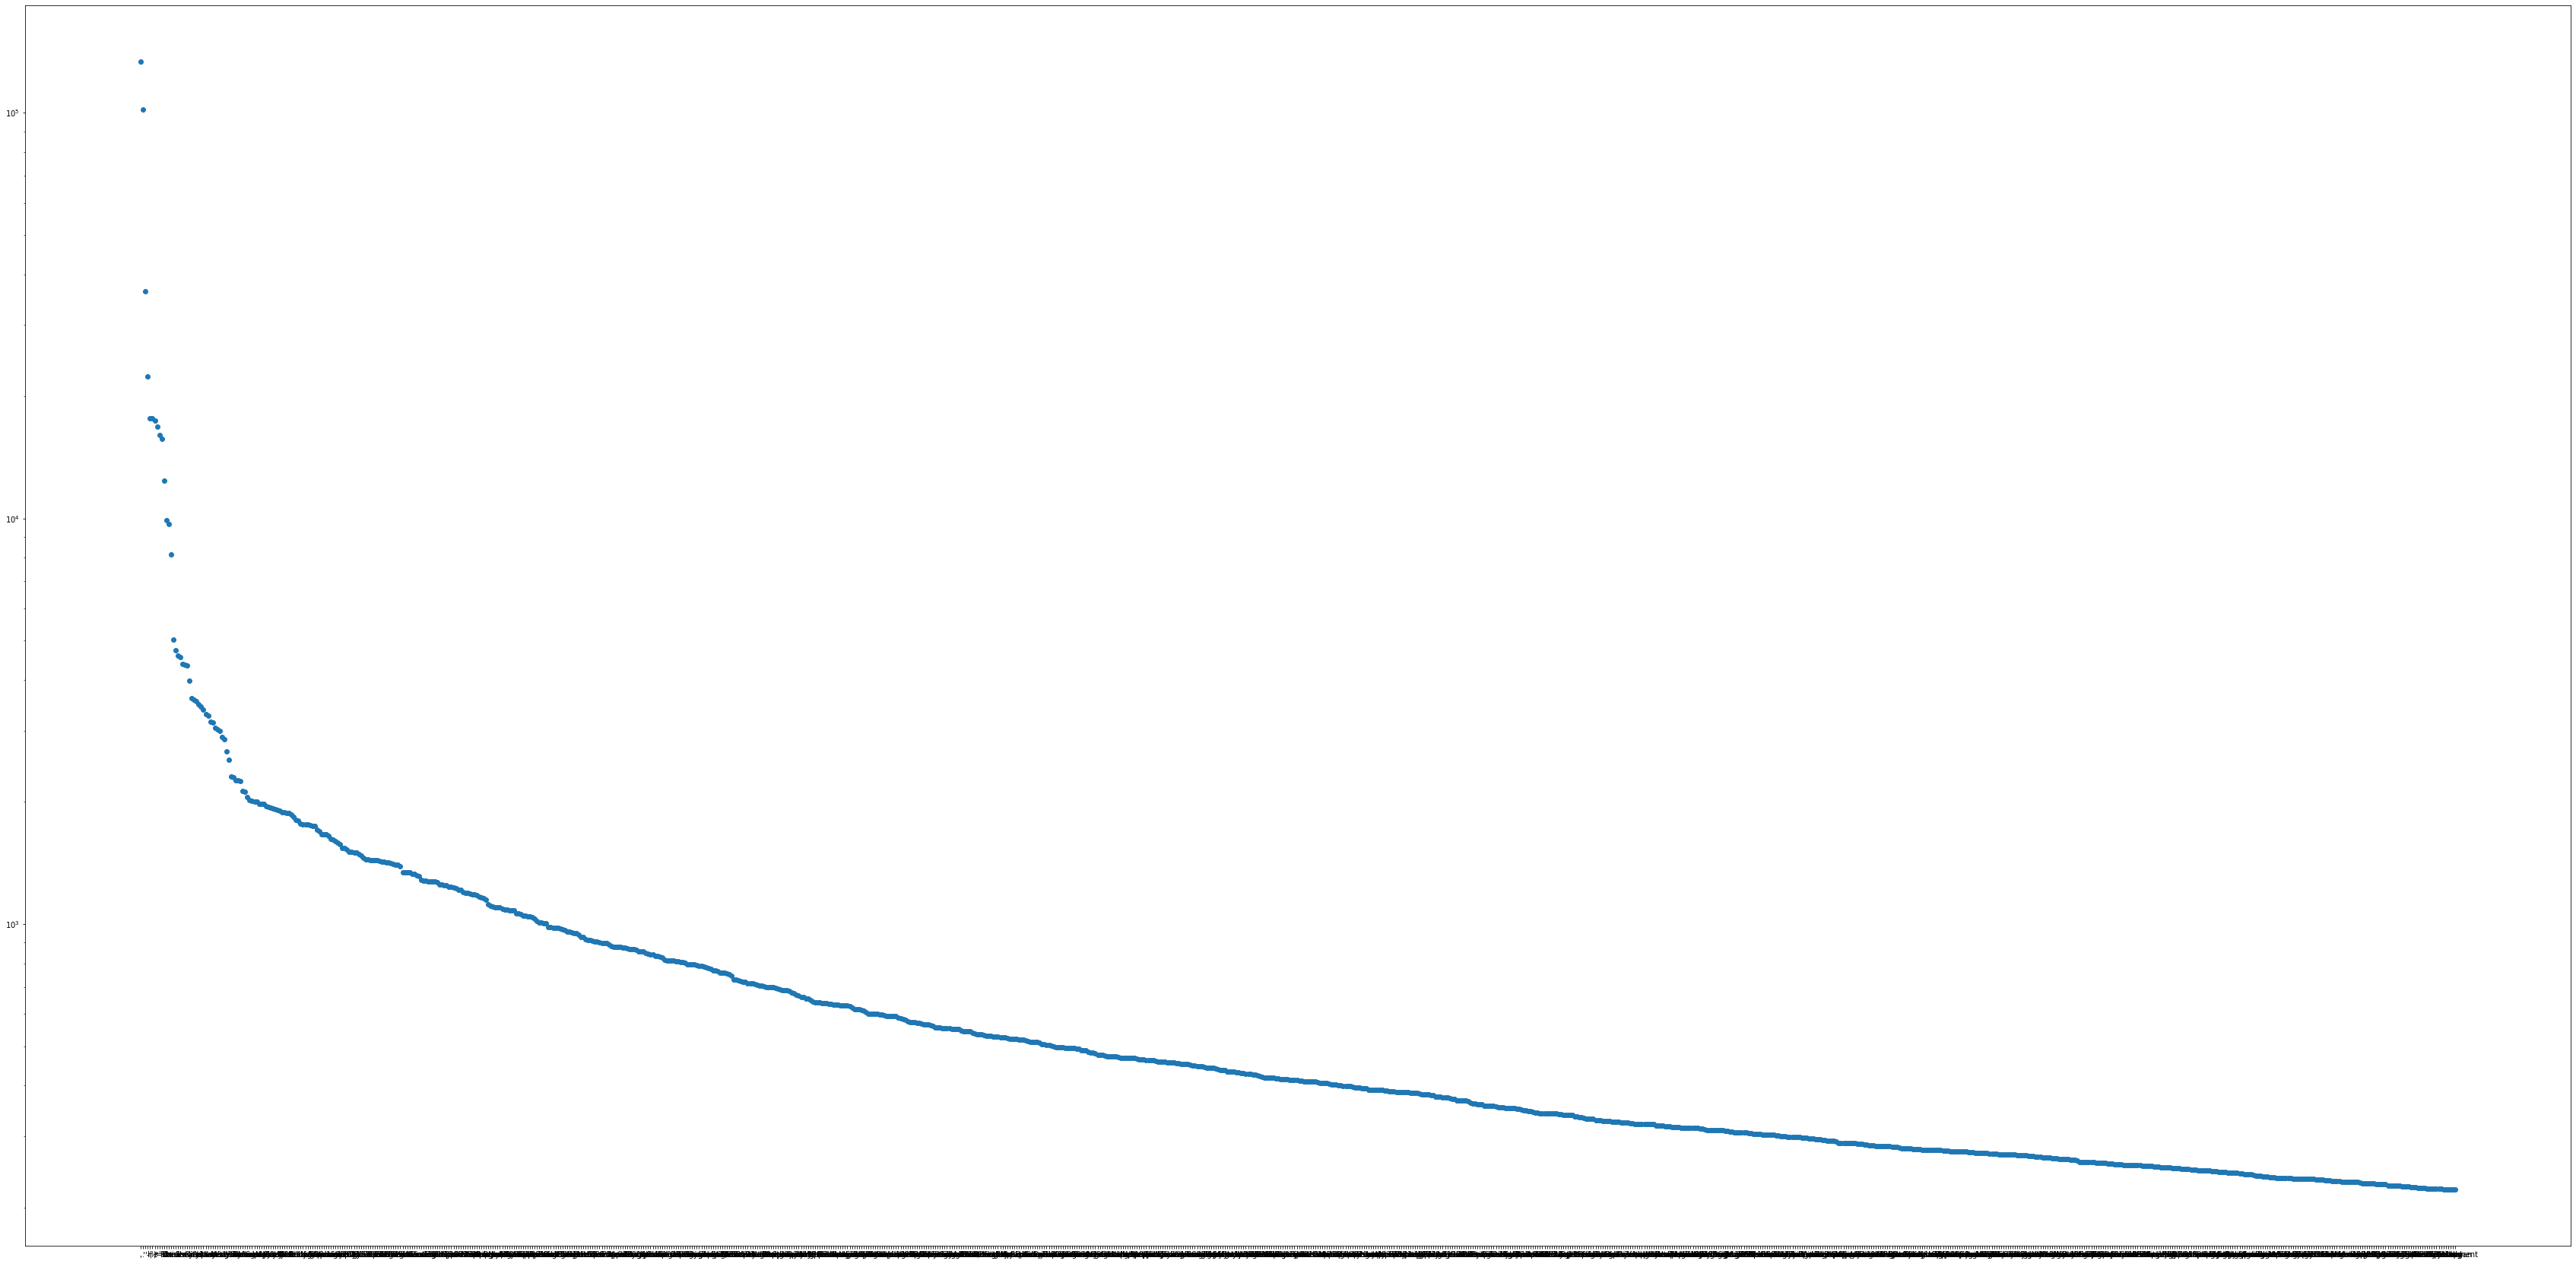

In [101]:
# useless code chunk
# an alternative way that is not so efficient
def wordFreqPlotAlt(filename, n = 1000):
    nlp = spacy.load("en_core_web_sm") # load the pretrained model

    # read the txt file
    with open(filename, "rb") as file:
        data = file.readlines()
    with open("stoplist.txt", "rb") as file:
        stopwords = file.readlines()
    data = [str.decode("utf-8").replace("\n","") for str in data] 
    stopwords = [str.decode("utf-8").replace("\n", "").replace("\r", "") for str in stopwords] # turn it into a list of string

    # count the word freq
    token_dict = {}
    for str in data:
        doc = nlp(str)
        for token in doc:
            if token.text not in stopwords:
                if token.text not in token_dict.keys():
                    token_dict[token.text] = 1
                else:
                    token_dict[token.text] += 1
    token_dict = {k: v for k, v in sorted(token_dict.items(), key=lambda x: x[1], reverse=True)} # sorted according to freq of token

    # plot log graph
    fig = plt.figure(figsize=(20, 10))
    plt.scatter(list(token_dict.keys())[:n], list(token_dict.values())[:n])
    plt.yscale("log")
    plt.show()
    
# wordFreqPlotAlt(collection1, 100)
# wordFreqPlotAlt(collection2, 100) # not done

### Q2-2

In [70]:
# a)
def stopFreqCount(doc_list):
    n = 0
    stopcount = 0
    for doc in doc_list:
        for token in doc:
            if token.is_stop:
                stopcount += 1
            n += 1
    return stopcount / n

# an alternative way that is not so efficient
def stopFreqCountAlt(filename):
    with open(filename, "rb") as file:
        data = file.readlines()
    data = [str.decode("utf-8").replace("\n","") for str in data]

    # count the freq of stopwords
    n = 0
    stopcount = 0
    for sentence in data:
        doc = nlp(sentence)
        for token in doc:
            if token.is_stop:
                stopcount += 1
            n += 1

    return stopcount / n

stopFreqCount(doc_list1), stopFreqCount(doc_list2)

(0.5023894130621247, 0.3415704344270364)

In [72]:
# b)
def capLetterCount(doc_list):
    n = 0
    capcount = 0
    for doc in doc_list:
        for token in doc:
            capcount += sum([1 for c in token.text if c.isupper()])
            n += len(token.text)
    return capcount / n

capLetterCount(doc_list1), capLetterCount(doc_list2)

(0.028095764040571274, 0.06166616658974901)

In [75]:
# c)
def avgCharInWord(doc_list):
    n = 0
    charcount = 0
    for doc in doc_list:
        for token in doc:
            charcount += len(token.text)
            n += 1
    return charcount / n

avgCharInWord(doc_list1), avgCharInWord(doc_list2)

(3.8004149058340433, 4.2209485911600115)

In [84]:
# d)
def POSCount(doc_list):
    n = 0
    ncount = 0
    adjcount = 0
    vcount = 0
    advcount = 0
    proncount = 0
    for doc in doc_list:
        for token in doc:
            if (token.pos_ == "NOUN"): ncount += 1
            if (token.pos_ == "ADJ"): adjcount += 1
            if (token.pos_ == "VERB"): vcount += 1
            if (token.pos_ == "ADV"): advcount += 1
            if (token.pos_ == "PRON"): proncount += 1
            n += 1
    return ncount / n, adjcount / n, vcount / n, advcount / n, proncount / n

POSCount(doc_list1), POSCount(doc_list2)

((0.16898863853323948,
  0.06160040806672689,
  0.12916508749782715,
  0.05416002940816077,
  0.14558179429675455),
 (0.13620578680741183,
  0.04545089694757646,
  0.0811959048607062,
  0.021178412679181274,
  0.041673797317865496))

In [103]:
# e)
def Top10POS(doc_list, N = 10):
    from heapq import nlargest # for n largest keys in a dict
    
    noun_dict = {}
    v_dict = {}
    adj_dict = {}
    
    # count the number in each POS
    for doc in doc_list:
        for token in doc:
            if token.pos_ == "NOUN": 
                if token.text in noun_dict.keys():
                    noun_dict[token.text] += 1
                else:
                    noun_dict[token.text] = 1
            if token.pos_ == "VERB":
                if token.text in v_dict.keys():
                    v_dict[token.text] += 1
                else:
                    v_dict[token.text] = 1
            if token.pos_ == "ADJ":
                if token.text in adj_dict.keys():
                    adj_dict[token.text] += 1
                else:
                    adj_dict[token.text] = 1
                    
    return nlargest(N, noun_dict, key = noun_dict.get), nlargest(N, v_dict, key = v_dict.get), nlargest(N, adj_dict, key = adj_dict.get)

Top10POS(doc_list1), Top10POS(doc_list2)

((['food',
   'love',
   'college',
   'thing',
   'people',
   'People',
   'reddit',
   'life',
   'time',
   'story'],
  ['love', 'have', 'do', '’s', 'be', 'loved', 'get', 'is', 'had', 'think'],
  ['best',
   'good',
   'favorite',
   'worst',
   'fast',
   'Serious',
   'other',
   'first',
   'most',
   'weirdest']),
 (['career',
   'season',
   'life',
   'years',
   'time',
   'team',
   'year',
   'member',
   'family',
   'club'],
  ['born',
   'was',
   'played',
   'became',
   'made',
   'had',
   'won',
   'died',
   'served',
   'began'],
  ['first',
   'second',
   'Early',
   'other',
   'new',
   'former',
   'several',
   '-',
   'American',
   'early']))

### Q2-3

In [120]:
import math
import string

doc_list3 = doc_list2[:10] # first 10 docs in the Wikipedia biographies collection

def TF(term, doc):
    count = 0
    for token in doc:
        if term.text == token.text:
            count += 1
    return math.log(count + 1)

def IDF(term, doc_list = doc_list3):
    N = len(doc_list)
    k = 0
    for doc in doc_list:
        if term.text in [token.text for token in doc]:
            k += 1
    return 1 + math.log(N / k)    

def getNlargestKeys(dic, n):
    from heapq import nlargest
    return nlargest(n, dic, key = dic.get)

def tf_idf(doc):
    tfidf_dict = {} # key = term.text, value = TF-IDF weight
    for token in doc:
        if sum([c in string.punctuation for c in token.text]) == 0: # no punctuation in token, then the token is a term
            if token.text not in tfidf_dict.keys():
                tfidf_dict[token.text] = TF(token, doc) * IDF(token)
    return getNlargestKeys(tfidf_dict, 5)
    
for i, doc in enumerate(doc_list3):
    print("The top 5 words with highest DF-IDF weight in doc", i, "are", tf_idf(doc))

The top 5 words with highest DF-IDF weight in doc 0 are ['Francesco', 'Redenti', '1820–1876', 'Italian', 'painter']
The top 5 words with highest DF-IDF weight in doc 1 are ['1936', 'Deacon', 'ice', 'hockey', 'Winter']
The top 5 words with highest DF-IDF weight in doc 2 are ['Hugh', 'Watlington', '1954', 'Bermudian', 'windsurfer']
The top 5 words with highest DF-IDF weight in doc 3 are ['Ershad', 'Party', 'Awami', 'Jatiya', 'after']
The top 5 words with highest DF-IDF weight in doc 4 are ['I', 'm', 'Sang', 'jo', '임상조']
The top 5 words with highest DF-IDF weight in doc 5 are ['Husayn', 'Fawzi', 'Al', 'Najjar', '1918']
The top 5 words with highest DF-IDF weight in doc 6 are ['football', 'Notre', 'Dame', 'played', 'American']
The top 5 words with highest DF-IDF weight in doc 7 are ['Reed', 'his', 'photographs', 'to', 'studio']
The top 5 words with highest DF-IDF weight in doc 8 are ['rugby', 'code', 'union', 'for', 'Billy']
The top 5 words with highest DF-IDF weight in doc 9 are ['Tomb', '

I do think tf-idf weight has a great performance on selecting a good summary for a document. :D

### Q2-4

Two another weighting I can come up with, which can hardly be calculated directly from inverted index:

+ The first one is POS weighting. One term can serve as difference Part-of-sentence (POS) in a document. Different POSs have different level of importance according to document type. For example, noun can be more important and have higher weight in a narrative type document. Also, numeric terms can occupy higher weight on some economimc or finance report. It can hardly be calculated directly from the inverted index.

+ Second, the historial weighting. The historical query can reflect the tendency of a customer's expectation on the search result to some extent. Hence we can put more weight on repeated term according to one's historical weighting, which is also hardly be calculated with only the document collection and the query now.

## Question 4

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Q4-1

In [103]:
def getCorpus(filename = collection1, num = "all"):
    with open(filename, "rb") as file:
        data = file.readlines()
    corpus = [str.decode("utf-8").replace("\n","") for str in data]
    if num == "all":
        return corpus
    else:
        return corpus[:int(num)]

def corpus2Vector(corpus = getCorpus()):
    # Convert the Reddit questions corpus to vectors (useless, for the homework requirement)
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(corpus).toarray()

def corpus2Model(corpus = getCorpus()):
    # Helper function of fitting the model
    vectorizer = CountVectorizer()
    model = vectorizer.fit(corpus)
    return model

def findMostNSimilar(query, n = 10):
    # Given a new query, return the 10 most similar in corpus
    # Query should be a list in this question, often with 1 element, e.g. ["Hello world"]
    corpus = getCorpus()
    model = corpus2Model()
    sim_vec = cosine_similarity(model.transform([query]).toarray(), model.transform(corpus).toarray()) # a 2D vector of similarity
    if n < len(sim_vec[0]):
        indices = np.argsort(sim_vec[0])[-n:][::-1] # indices of largest n similarity
    return [corpus[i] for i in indices]

### Q4-2

#### Q4-2.1

In [104]:
# (1)
findMostNSimilar("programming")

['How to start programming?',
 'Java SE programming training',
 'How to start programming? What are important things i have to learn in programming?',
 'Where can i find programming podcast?',
 'Which language programming do you prefer?',
 'What is your best quotes about programming?',
 'Programmers, what do you like about programming?',
 'What decisions/reactions are hardcoded in your programming?',
 'Is DNA an object-oriented life-programming language ?',
 'What is your favorite programming language and why?']

In [88]:
# (2)
findMostNSimilar("pets")

["What's your pets name?",
 '"People with pets on Reddit, What was the most Weirdest thing your pets did?"',
 "What's your pets name?",
 "What's your pets name?",
 'Whats your pets name?',
 'What’s your pets name??',
 'If there was a dating app for pets, what would your pets ‘Tell Us About Yourself’ be?',
 "redditors who have inadvertently gotten their pets high on some drug, what was your pets' reaction?",
 'What is your pets name?',
 'What is your pets name?']

In [89]:
# (3)
findMostNSimilar("college")

['Fellow broke college students, how did you survive college?',
 'Current college students or college grads: What is (was) your favorite thing about going to college and being on campus?',
 'Is college a scam?',
 'College dropouts what finally made you give up on college',
 'College students/alumni, what actually helped you get through college?',
 'Choosing a college computer',
 'College dropouts what finally made you give up on college?',
 'Paying for college',
 'Post college decisions',
 'College students, what crazy things have you seen/experienced at college?']

In [91]:
# (4)
findMostNSimilar("love")

['love?',
 'love',
 'Love',
 'Is online love real love?',
 'Romantic love or mature love?',
 'Dumb love',
 'I love reddit.',
 'Fuck love',
 'Not love',
 'I love this']

In [90]:
# (5)
findMostNSimilar("food")

['Which food delivery is better Grab Food or Uber Food in Thailand?',
 'Send food',
 'food advice',
 'Voodoo food',
 'Forever food',
 'People in food service or food prep, have you ever spit in someone’s food?',
 'What food gave you the worst food poisoning?',
 'What are your favorite fast food/junk food items?',
 'Fast food, or food-related job employees of Reddit, what is/was the weirdest food combination a customer has ordered before?',
 'Pill vs food?']

#### Q4-2.2

In [94]:
# score the retrieved questions
# very relevent: 2
# somewhat relevent: 1
# not relevent: 0
score1 = [2, 1, 2, 0, 1, 1, 1, 1, 0, 2]
score2 = [2, 1, 2, 2, 2, 2, 1, 0, 2, 2]
score3 = [2, 2, 2, 2, 2, 1, 2, 2, 1, 1]
score4 = [1, 1, 1, 1, 2, 2, 0, 2, 2, 0]
score5 = [1, 2, 2, 2, 2, 1, 1, 2, 1, 1]

#### Q4-2.3

Assumption: There must exist 10 or more very relevent in the given corpus.

In [101]:
import math
IDCG_10 = sum([2] + [2 / math.log2(i) for i in range(2, 11)]) # for all

def countDCG_10(score):
    return score[0] + sum([score[i - 1] / math.log2(i) for i in range(2, 11)])

DCG_10 = np.array([countDCG_10(score1), countDCG_10(score2), countDCG_10(score3), countDCG_10(score4), countDCG_10(score5)])
NDCG_10 = DCG_10 / IDCG_10
print("The NDCG_10 for each query are (in sequence):", NDCG_10)

The NDCG_10 for each query are (in sequence): [0.60624189 0.80751014 0.90452481 0.57699032 0.77547271]


### Q4-3

From my point of view, I think IR system works pretty well since it can successfully extract the documents with the word queried.

I do consider that the IR system works more powerful on retrieving the obejective thing so that I think it works well on the objective items like "college" instead of subjective emotion "love". 

### Q4-4

D:\Software\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


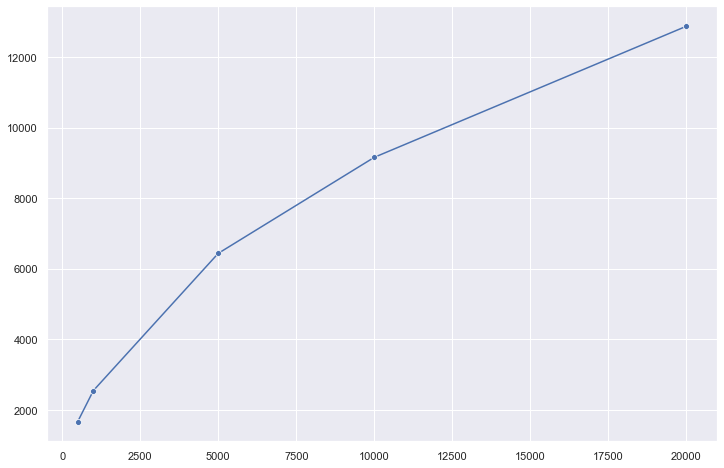

In [153]:
scales = ["500", "1000", "5000", "10000", "20000"]
x = [int(s) for s in scales]
y = [len(corpus2Model(getCorpus(num=s)).vocabulary_) for s in scales]
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))
plot = sns.lineplot(x, y, marker="o")

This approach won’t scale as we get more documents. According to the graph above, the slope of each segment becomes smaller as the scale become larger (from 500 to 20000). This indicates that the vocabulary set in corpus is reaching the overall number of vocabulary in English. As a result, the speed of increasing will be slower.

Hence the scale will not get increase infinitely as we get more documents.